## Data Cleaning
### This notebook summarises the tools and concepts taught at: https://www.kaggle.com/learn/data-cleaning

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
sf_permits = pd.read_csv("data_clean/Building_Permits.csv")

# set seed for reproducibility
np.random.seed(0) 
sf_permits.head()

/tmp/ipykernel_3594/4015653429.py:6: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_permits = pd.read_csv("data_clean/Building_Permits.csv")


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [2]:
# Counting missing values
missing_values_count = sf_permits.isnull().sum()
print(missing_values_count[0:10])

# how many total missing values do we have?
total_cells = np.product(sf_permits.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f"Percentage of missing data: {percent_missing:.2f}% missing")

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64
Percentage of missing data: 26.26% missing


## Dropping Rows/Columns containing missing values

In [9]:
# Drop rows
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [12]:
# Drop columns
sf_permits_with_na_dropped = sf_permits.dropna(axis=1)
print(sf_permits_with_na_dropped.head())

dropped_columns = sf_permits.shape[1]-sf_permits_with_na_dropped.shape[1]
print(f"No. of columns left: {sf_permits_with_na_dropped.shape[1]}")
print(f"No. of dropped columns: {dropped_columns}")

  Permit Number  Permit Type            Permit Type Definition   
0  201505065519            4                      sign - erect  \
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   

  Permit Creation Date Block  Lot  Street Number Street Name Current Status   
0           05/06/2015  0326  023            140       Ellis        expired  \
1           04/19/2016  0306  007            440       Geary         issued   
2           05/27/2016  0595  203           1647     Pacific      withdrawn   
3           11/07/2016  0156  011           1230     Pacific       complete   
4           11/28/2016  0342  001            950      Market         issued   

  Current Status Date  Filed Date      Record ID  
0          12/21/2017  05/06/2015  1380611233945  
1          08/03/2017  04/

## Replacing NAs with neighbors

In [25]:
# fill missing with data the comes directly after (next row)
print("Before")
print(sf_permits.iloc[:, [0,1,2,7,15,16,17]].head())
sf_permits_with_na_imputed = sf_permits.fillna(method='bfill', axis=0)
# then fill rest of missing with 0
sf_permits_with_na_imputed = sf_permits_with_na_imputed.fillna(0)
print("After")
print(sf_permits_with_na_imputed.iloc[:,[0,1,2,7,15,16,17]].head())

Before
  Permit Number  Permit Type            Permit Type Definition   
0  201505065519            4                      sign - erect  \
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   

  Street Number Suffix  Filed Date Issued Date Completed Date  
0                  NaN  05/06/2015  11/09/2015            NaN  
1                  NaN  04/19/2016  08/03/2017            NaN  
2                  NaN  05/27/2016         NaN            NaN  
3                  NaN  11/07/2016  07/18/2017     07/24/2017  
4                  NaN  11/28/2016  12/01/2017            NaN  
After
  Permit Number  Permit Type            Permit Type Definition   
0  201505065519            4                      sign - erect  \
1  201604195146            4                      sign - erect   
2  20160

## Scaling and Normalisation
In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:
- in scaling, you're changing the range of your data, while
- in normalization, you're changing the shape of the distribution of your data.

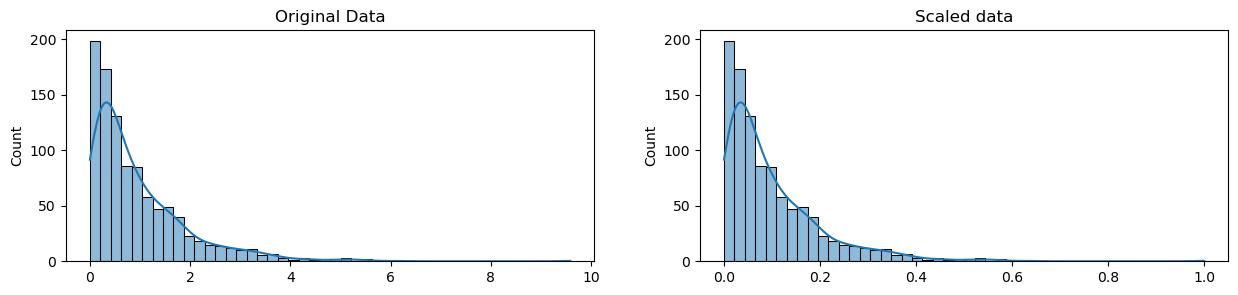

In [30]:
# Scaling: Shape doesnt change
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

# Only difference is range from [0,10] to [0,1]

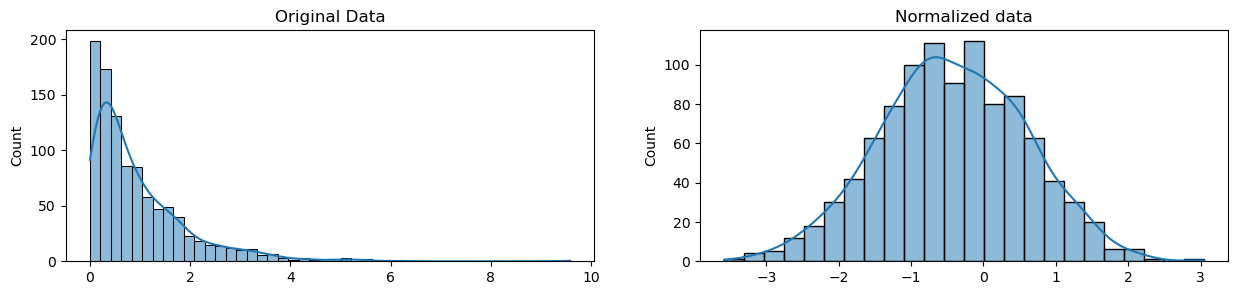

In [33]:
# Normalising: using boxcox, shape of distribution changed
from scipy import stats
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

## When NOT to scale/normalize?
In most cases, it is a good idea to scale and normalize continous data. When is it not necessary? Chat-GPT gave the following reasons:
- Tree-based algorithms: Tree-based algorithms, such as decision trees and random forests, are generally not sensitive to the scale of features. These algorithms make decisions based on feature thresholds and do not rely on the magnitude of features. Therefore, scaling or normalization is typically not required for tree-based algorithms.

- Categorical variables: Categorical variables that represent different categories or labels typically do not require scaling or normalization. These variables do not have a numerical magnitude that needs to be adjusted. Instead, they are typically encoded using techniques such as one-hot encoding or label encoding.

- Feature engineering: If you have already engineered your features in a way that their magnitudes are meaningful and reflect the underlying domain knowledge, scaling or normalization may not be necessary. This situation can occur when the feature engineering process has already taken care of scaling or normalization requirements.

- Interpretability: In some cases, preserving the original scale of the features might be important for the interpretability of the model or the understanding of the problem. If the magnitude or distribution of the features carries valuable information or is critical for interpreting the results, it may be advisable not to scale or normalize the data.

## Parsing Dates

In [4]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("data_clean/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [7]:
print(landslides['date'].head())
print(landslides['date'].dtype)
# Date column is of type 'Object'

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object
object


In [9]:
#Convert to datetime
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

### Multiple date formats: Can tell pandas to infer

In [ ]:
# landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

### Using parsed dates, eg. can extract day of the month:

In [14]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

### Double checking dates: day of month

<Axes: xlabel='date_parsed', ylabel='Count'>

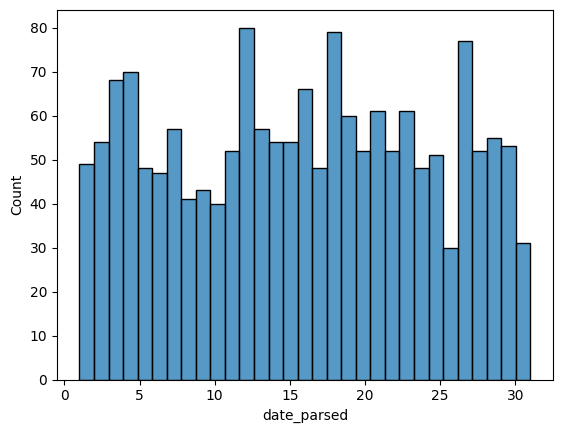

In [19]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.histplot(day_of_month_landslides, kde=False, bins=31)
# Days are withing 0 to 31, good to go

### Can also use parse_dates in [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
Warning, method might be slow

## Character Encoding
Character encodings are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). There are many different encodings, and if you tried to read in text with a different encoding than the one it was originally written in, you ended up with scrambled text called "mojibake" (said like mo-gee-bah-kay). Here's an example of mojibake:

æ–‡å—åŒ–ã??

You might also end up with a "unknown" characters. There are what gets printed when there's no mapping between a particular byte and a character in the encoding you're using to read your byte string in and they look like this:

����������

In [9]:
# from byte --decode--> big5-tw --encode--> utf-8
sample_entry = b'\xa7A\xa6n'
print(sample_entry)
print('data type:', type(sample_entry))
new_entry = sample_entry.decode("big5-tw")
print(new_entry)
new_entry = new_entry.encode("utf-8")
print(new_entry)

b'\xa7A\xa6n'
data type: <class 'bytes'>
你好
b'\xe4\xbd\xa0\xe5\xa5\xbd'


In [ ]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

In [2]:
# helpful character encoding module
import charset_normalizer
import pandas as pd
import numpy as np

# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("data_clean/ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

In [5]:
# look at the first ten thousand bytes to guess the character encoding
with open("data_clean/ks-projects-201612.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


In [7]:
# read in the file with the encoding detected by charset_normalizer
kickstarter_2016 = pd.read_csv("data_clean/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()
# Can then save in utf-8: 
# # save our file (will be saved as UTF-8 by default!)
# kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

/tmp/ipykernel_1733/412143202.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv("data_clean/ks-projects-201612.csv", encoding='Windows-1252')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


## Encoding might be guessed wrongly:
Can increase number of rows guesser has access to

## Cleaning Inconsistent Text Entries

In [7]:
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

# read in all our data
professors = pd.read_csv("data_clean/pakistan_intellectual_capital.csv")

# set seed for reproducibility
np.random.seed(0)

# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

### Concerns: 
We have "Germany" and "germany",
"USA" and "USofA",
"SouthKorea" and "South Korea"

First thing to try: make everything lower case (I can change it back at the end if I like) and remove any white spaces at the beginning and end of cells. Inconsistencies in capitalizations and trailing white spaces are very common in text data and you can fix a good 80% of your text data entry inconsistencies by doing this.

In [8]:
# convert to lower case
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

In [9]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

As seen above, most inconsistencies solved, but others remain: "south korea" vs "southkorea"

## Fuzzywuzzy
Fuzzy matching: The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (rplace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.

Fuzzywuzzy returns a **ratio given two strings.** The **closer the ratio is to 100, the smaller the edit distance between the two strings.** Here, we're going to get the ten strings from our list of cities that have the closest distance to "south korea".

In [10]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

In [12]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")
    
# use the function we just wrote to replace close matches to "south korea" with "south korea"
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")

All done!


In [13]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)